In [1]:
import pandas as pd
import numpy as np

np.random.seed(1234)

hours_studied = np.random.uniform(0, 10, 100)
hours_slept = np.random.uniform(3, 9, 100)

linear_combination = 0.8 * hours_studied - 0.5 * np.abs(hours_slept - 6) + np.random.normal(0, 0.5, 100)

prob_passed = 1 / (1 + np.exp(-linear_combination))
passed = (prob_passed > 0.5).astype(int)

df = pd.DataFrame({
    'hours_studied': hours_studied,
    'hours_slept': hours_slept,
    'passed': passed
})

df.head()

,hours_studied,hours_slept,passed
0,1.915195,7.602700,1
1,6.221088,7.248692,1
2,4.377277,7.781203,1
3,7.853586,6.346565,1
4,7.799758,8.795019,1


In [2]:
from sklearn.model_selection import train_test_split

X = df[['hours_studied', 'hours_slept']]
y = df['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

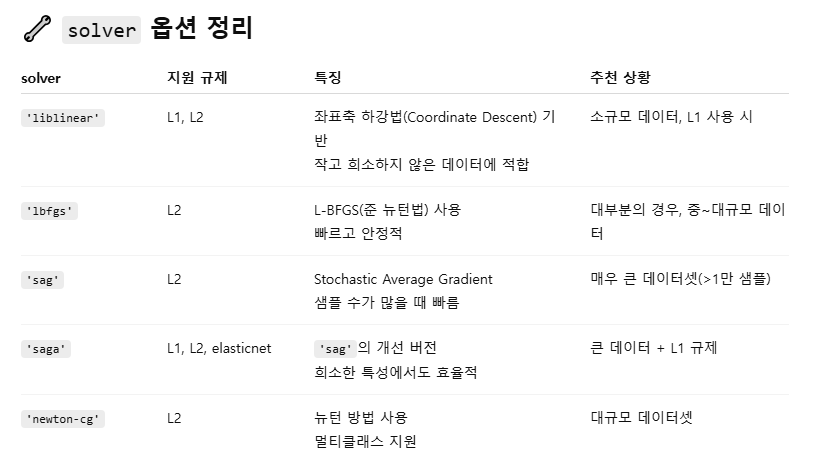
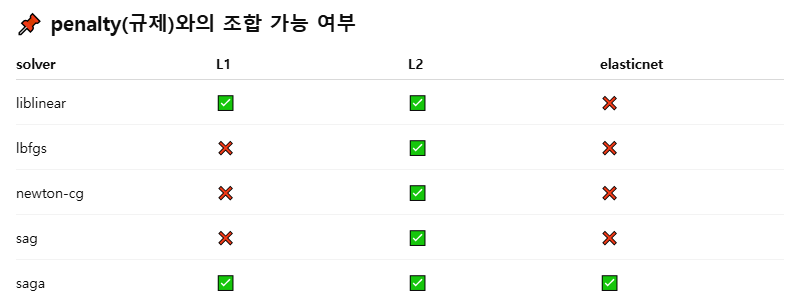

In [3]:
# 학습
from sklearn.linear_model import LogisticRegression

# C=1.0 (default, 약한 규제, 복잡한 모델) : 정규화 파라미터 lambda
# C=0.01 강한 규제(단순 모델)
# 과대합이 의심되면 C를 낮추고, 과소적합이라면 C를 높이면 된다.

# fit_intercept=True : 절편을 포함하여 학습

model = LogisticRegression(random_state=1234, solver='newton-cg')
model.fit(X_train, y_train)

print("Intercept (절편):", model.intercept_)
print("Coefficients (계수):", model.coef_)

Intercept (절편): [-0.84516673]
Coefficients (계수): [[ 1.67310938 -0.11404722]]


In [4]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))

# pos_label=1 => 1이 양성 클래스라고 간주 (default)
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

Accuracy : 0.85
Recall : 1.0
Precision : 0.8235294117647058
F1 Score: 0.9032258064516129
